Using the data analytics tools and techniques learnt from the lectures, you are required to apply different techniques related to descriptive and predictive analytics on the integrated dataset. 

You will also be required to develop a prediction model using one linear regression technique, one clustering technique and one classification technique. 

The assignment deliverables will consist of the following: 

001 - A report containing: 

      a. Definition of, at least, two different hypotheses based on the current dataset; 

      b. Explanation and justification for any cleaning/integration technique used in the dataset; 

      c. Analysis and interpretation of results using descriptive analytics; 

     d. Implementation of a prediction model using one linear regression technique, one clustering technique and one classification        technique; 

     e. Critical review of the data analytics tools and techniques used. You have to analyse the effectiveness of the techniques you have used, discuss alternative solutions and compare strengths and weaknesses between them; 

    f. Critical review of the visualisation tools used. You have to analyse the effectiveness of the visualisation tools you have used, discuss alternative solutions and compare strengths and weaknesses between them; 

   g. References and citations to support the analysis made in the report. 



002 - Uploaded to Moodle  containing

   a.  R code supporting the report provided. The R code has to provide all the code used for cleaning, integrating, analysing, visualising and creating the models proposed and discussed in the report

```
-- Dataset Merging and Preperation (Dataset Pre-processing)
    -- Data Cleaning (Dataset Pre-processing)

-- Data Exploration
   -- Explore the in-consistent months
   
-- Descriptive Data Analytics
    -- Data Sampling & Visualisation 
    
-- Diagnostic Data Analytics
    -- Covariance + Correlation
    
-- Predictive Data Analytics 
    (Linear Regression, Time Series, Classification, Clustering)

-- Prescriptive Data Analytics
```

In [1]:
# install.packages('hash')
# install.packages('tidyverse')
# install.packages('zoo')
# install.packages("skimr")
# install.packages("devtools")
# devtools::install_github("ropensci/visdat")
# install.packages("DataExplorer")
# install.packages("inspectdf")
# install.packages("ggcorrplot")
# install.packages("corrplot")

In [2]:
library(readr)
library(hash)
library(tidyverse)
library(data.table)
library(zoo)
library(dplyr)
library(ggmap)
library(skimr)
library(devtools)
library(visdat)
library(DataExplorer)
library(inspectdf)
library(ggplot2)
library(ggcorrplot)
library(corrplot)
library(reshape2)

hash-2.2.6.2 provided by Decision Patterns


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.5.0 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


The following object is masked from ‘package:hash’:

    copy



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


ℹ Google's Terms of Service: <https://mapsplatform.google.com>

ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.

Loading required package: usethis

corrplot 0.92 loaded


Attaching package: 

# Dataset Integration

In [3]:
get_all_files_from_directories <- function () {
    files <- hash()

    files["2014"] <- list.files("dataset/2014", pattern=".csv")
    files["2015"] <- list.files("dataset/2015", pattern=".csv")
    files["2016"] <- list.files("dataset/2016", pattern=".csv")
    files["2017"] <- list.files("dataset/2017", pattern=".csv")
    files["2018"] <- list.files("dataset/2018", pattern=".csv")
  
    return(files)
}

In [4]:
get_all_files_from_directories()

<hash> containing 5 key-value pair(s).
  2014 : principal_offence_category_april_2014.csv     principal_offence_category_august_2014.csv    principal_offence_category_december_2014.csv  principal_offence_category_february_2014.csv  principal_offence_category_january_2014.csv   principal_offence_category_july_2014.csv      principal_offence_category_june_2014.csv      principal_offence_category_march_2014.csv     principal_offence_category_may_2014.csv       principal_offence_category_november_2014.csv  principal_offence_category_october_2014.csv   principal_offence_category_september_2014.csv
  2015 : principal_offence_category_april_2015.csv     principal_offence_category_august_2015.csv    principal_offence_category_december_2015.csv  principal_offence_category_february_2015.csv  principal_offence_category_january_2015.csv   principal_offence_category_july_2015.csv      principal_offence_category_june_2015.csv      principal_offence_category_march_2015.csv     principal_offence_categ

In [5]:
merge_files <- function(hash) {
    year <- names(hash)

    combined_df <- do.call(rbind, lapply(year, function(y) {
    do.call(rbind, lapply(hash[[y]], function(f) {
        f_name <- paste("dataset/", y, "/", f, sep="")
            df <- read.csv(f_name, stringsAsFactors = FALSE)
            df$year <- y
            df$month <- tolower(gsub(".csv", "", as.list(strsplit(f, "_")[[1]])[4]))
            df
    }))
  }))
  return(combined_df)
}

In [6]:
combined_df = merge_files(get_all_files_from_directories())

In [7]:
head(combined_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,year,month
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,81,85.3%,14,14.7%,"7,805",74.1%,"2,722",25.9%,698,⋯,513,16.3%,"8,283",86.3%,"1,314",13.7%,718,100.0%,2014,april
2,Avon and Somerset,1,100.0%,0,0.0%,167,78.8%,45,21.2%,36,⋯,16,19.5%,188,83.6%,37,16.4%,24,100.0%,2014,april
3,Bedfordshire,0,-,0,-,69,75.0%,23,25.0%,5,⋯,6,35.3%,40,88.9%,5,11.1%,16,100.0%,2014,april
4,Cambridgeshire,0,-,0,-,99,81.1%,23,18.9%,6,⋯,2,25.0%,79,92.9%,6,7.1%,4,100.0%,2014,april
5,Cheshire,1,50.0%,1,50.0%,140,74.9%,47,25.1%,17,⋯,6,10.7%,209,94.6%,12,5.4%,1,100.0%,2014,april
6,Cleveland,0,-,0,-,85,67.5%,41,32.5%,11,⋯,5,15.2%,124,87.9%,17,12.1%,10,100.0%,2014,april


In [8]:
write.csv(combined_df, "dataset/merged-data.csv", row.names=FALSE)

# Data Cleaning

In [9]:
combined_df <- read.csv("dataset/merged-data.csv")

In [10]:
glimpse(combined_df)

Rows: 2,193
Columns: 53
$ X                                                                  <chr> "Na…
$ Number.of.Homicide.Convictions                                     <int> 81,…
$ Percentage.of.Homicide.Convictions                                 <chr> "85…
$ Number.of.Homicide.Unsuccessful                                    <int> 14,…
$ Percentage.of.Homicide.Unsuccessful                                <chr> "14…
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "7,…
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "74…
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,…
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "25…
$ Number.of.Sexual.Offences.Convictions                              <chr> "69…
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72…
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 269…
$ Percentage.of.

In [11]:
drop_percentage_columns <- function(dataframe) {
  col_names <- colnames(dataframe)
  to_drop <- grep("Percentage", col_names, value = TRUE)
  dataframe <- dataframe[, !(col_names %in% to_drop)]
  return(dataframe)
}

In [12]:
combined_df = drop_percentage_columns(combined_df)

In [13]:
head(combined_df)

,X,Number.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,Number.of.Sexual.Offences.Unsuccessful,Number.of.Burglary.Convictions,Number.of.Burglary.Unsuccessful,Number.of.Robbery.Convictions,⋯,Number.of.Drugs.Offences.Unsuccessful,Number.of.Public.Order.Offences.Convictions,Number.of.Public.Order.Offences.Unsuccessful,Number.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,year,month
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,National,81,14,"7,805","2,722",698,269,"1,470",226,517,⋯,279,"3,549",654,"2,640",513,"8,283","1,314",718,2014,april
2,Avon and Somerset,1,0,167,45,36,8,37,2,9,⋯,2,68,11,66,16,188,37,24,2014,april
3,Bedfordshire,0,0,69,23,5,1,16,1,4,⋯,2,29,6,11,6,40,5,16,2014,april
4,Cambridgeshire,0,0,99,23,6,3,8,0,6,⋯,2,45,9,6,2,79,6,4,2014,april
5,Cheshire,1,1,140,47,17,3,26,3,1,⋯,10,86,7,50,6,209,12,1,2014,april
6,Cleveland,0,0,85,41,11,4,25,10,5,⋯,7,74,27,28,5,124,17,10,2014,april


In [14]:
sort_by_yearmon <- function(dataframe){
  dataframe$yearmon <- as.Date(paste(dataframe$year, dataframe$month, "01", sep = "-"), "%Y-%b-%d")
  dataframe <- dataframe[order(dataframe$yearmon),]
  return(dataframe)
}

In [15]:
combined_df <- sort_by_yearmon(combined_df)

In [16]:
head(combined_df)

,X,Number.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,Number.of.Sexual.Offences.Unsuccessful,Number.of.Burglary.Convictions,Number.of.Burglary.Unsuccessful,Number.of.Robbery.Convictions,⋯,Number.of.Public.Order.Offences.Convictions,Number.of.Public.Order.Offences.Unsuccessful,Number.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,year,month,yearmon
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<date>
173,National,51,11,"9,087","2,930",736,286,"1,715",284,522,⋯,"4,752",797,"3,291",586,"12,945","1,466",890,2014,january,2014-01-01
174,Avon and Somerset,0,0,228,62,35,17,49,1,8,⋯,123,28,63,9,256,40,20,2014,january,2014-01-01
175,Bedfordshire,0,1,68,29,2,1,7,4,16,⋯,30,9,13,2,171,13,12,2014,january,2014-01-01
176,Cambridgeshire,0,0,101,21,10,3,18,4,6,⋯,37,2,28,9,103,16,14,2014,january,2014-01-01
177,Cheshire,0,0,170,40,15,1,38,5,10,⋯,77,8,50,5,264,16,13,2014,january,2014-01-01
178,Cleveland,2,3,119,44,11,6,36,2,3,⋯,123,27,34,14,228,16,3,2014,january,2014-01-01


In [17]:
shift_columns <- function(dataframe){
  cols <- colnames(dataframe)
  cols <- c(cols[1], cols[(length(cols)-2):length(cols)], cols[2:(length(cols)-3)])
  dataframe[, cols]
}

In [18]:
combined_df <- shift_columns(combined_df)

In [19]:
head(combined_df)

,X,year,month,yearmon,Number.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,Number.of.Sexual.Offences.Unsuccessful,⋯,Number.of.Criminal.Damage.Unsuccessful,Number.of.Drugs.Offences.Convictions,Number.of.Drugs.Offences.Unsuccessful,Number.of.Public.Order.Offences.Convictions,Number.of.Public.Order.Offences.Unsuccessful,Number.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful
,<chr>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
173,National,2014,january,2014-01-01,51,11,"9,087","2,930",736,286,⋯,472,"4,988",305,"4,752",797,"3,291",586,"12,945","1,466",890
174,Avon and Somerset,2014,january,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,january,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,january,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,january,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,january,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [20]:
rename_columns <- function(dataframe){
  colnames(dataframe) <- gsub("Number.of.", "", colnames(dataframe))
  colnames(dataframe) <- gsub("\\.", "_", colnames(dataframe))
  colnames(dataframe) <- tolower(colnames(dataframe))
  return(dataframe)
}

In [21]:
combined_df <- rename_columns(combined_df)

In [22]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
173,National,2014,january,2014-01-01,51,11,"9,087","2,930",736,286,⋯,472,"4,988",305,"4,752",797,"3,291",586,"12,945","1,466",890
174,Avon and Somerset,2014,january,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,january,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,january,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,january,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,january,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [23]:
remove_special_characters_and_convert_to_integer <- function(dataframe){
  dataframe <- dataframe %>% 
    mutate_all(funs(gsub(",", "", .)))
  dataframe[,5:ncol(dataframe)] <- sapply(dataframe[,5:ncol(dataframe)], as.integer)
  return(dataframe)
}

In [24]:
combined_df <- remove_special_characters_and_convert_to_integer(combined_df)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [25]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,january,2014-01-01,51,11,9087,2930,736,286,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,january,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,january,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,january,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,january,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,january,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [26]:
unique(combined_df$month)

[1] "january"   "february"  "march"     "april"     "may"       "june"     
 [7] "july"      "august"    "september" "october"   "november"  "december" 
[13] "jul"       "aug"       "sep"       "oct"       "nov"       "dec"      
[19] "jan"       "feb"       "mar"

In [27]:
convert_months <- function(df){
  df$month <- gsub("january", "jan", df$month)
  df$month <- gsub("february", "feb", df$month)
  df$month <- gsub( "march", "mar",df$month)
  df$month <- gsub("april", "apr", df$month)
  df$month <- gsub( "may", "may", df$month)
  df$month <- gsub("june","jun",  df$month)
  df$month <- gsub( "july", "jul",df$month)
  df$month <- gsub("august","aug",  df$month)
  df$month <- gsub("september", "sep", df$month)
  df$month <- gsub( "october","oct", df$month)
  df$month <- gsub("november", "nov", df$month)
  df$month <- gsub("december","dec",  df$month)
  return(df)
}

In [28]:
combined_df <- convert_months(combined_df)

In [29]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,51,11,9087,2930,736,286,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,jan,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,jan,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,jan,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,jan,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [30]:
get_missing_months <- function(dataframe){
  years <- unique(dataframe$year)
  missing_months <- list()
  

  for (year in years){
    months <- unique(dataframe[dataframe$year == year,]$month)
    all_months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
    diff <- setdiff(all_months, months)
    missing_months[[year]] <- diff
  }
  
  return(missing_months)
}

In [31]:
get_missing_months(combined_df)

$`2014`
character(0)

$`2015`
[1] "nov"

$`2016`
[1] "feb" "mar"

$`2017`
[1] "apr" "may" "jun"

$`2018`
[1] "apr" "may" "jun"

In [32]:
unique(combined_df$x)

[1] "National"              "Avon and Somerset"     "Bedfordshire"         
 [4] "Cambridgeshire"        "Cheshire"              "Cleveland"            
 [7] "Cumbria"               "Derbyshire"            "Devon and Cornwall"   
[10] "Dorset"                "Durham"                "Dyfed Powys"          
[13] "Essex"                 "Gloucestershire"       "GreaterManchester"    
[16] "Gwent"                 "Hampshire"             "Hertfordshire"        
[19] "Humberside"            "Kent"                  "Lancashire"           
[22] "Leicestershire"        "Lincolnshire"          "Merseyside"           
[25] "Metropolitan and City" "Norfolk"               "Northamptonshire"     
[28] "Northumbria"           "North Wales"           "North Yorkshire"      
[31] "Nottinghamshire"       "South Wales"           "South Yorkshire"      
[34] "Staffordshire"         "Suffolk"               "Surrey"               
[37] "Sussex"                "Thames Valley"         "Warwickshire"         
[40] "West Mercia"           "West Midlands"         "West Yorkshire"       
[43] "Wiltshire"

In [33]:
county_region_map <- list(
  "National" = "All",
  "Avon and Somerset" = "West",
  "Bedfordshire" = "East",
  "Cambridgeshire" = "East",
  "Cheshire" = "North",
  "Cleveland" = "North",
  "Cumbria" = "North",
  "Derbyshire" = "East",
  "Devon and Cornwall" = "West",
  "Dorset" = "West",
  "Durham" = "North",
  "Dyfed Powys" = "West",
  "Essex" = "East",
  "Gloucestershire" = "West",
  "GreaterManchester" = "North",
  "Gwent" = "West",
  "Hampshire" = "South",
  "Hertfordshire" = "East",
  "Humberside" = "North",
  "Kent" = "South",
  "Lancashire" = "North",
  "Leicestershire" = "East",
  "Lincolnshire" = "East",
  "Merseyside" = "North",
  "Metropolitan and City" = "South",
  "Norfolk" = "East",
  "Northamptonshire" = "East",
  "Northumbria" = "North",
  "North Wales" = "North",
  "North Yorkshire" = "North",
  "Nottinghamshire" = "East",
  "South Wales" = "West",
  "South Yorkshire" = "North",
  "Staffordshire" = "West",
  "Suffolk" = "East",
  "Surrey" = "South",
  "Sussex" = "South",
  "Thames Valley" = "South",
  "Warwickshire" = "West",
  "West Mercia" = "West",
  "West Midlands" = "West",
  "West Yorkshire" = "North",
  "Wiltshire" = "West"
)

In [34]:
label_county_region <- function(df, county_region) {  
  region <- c()

  for (i in 1:nrow(df)) {
    county <- df$x[i]
    region[i] <- county_region[[county]]
  }
  
  df$region <- region
  
  return(df)
}

In [35]:
combined_df <- label_county_region(combined_df, county_region_map)

In [36]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful,region
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
173,National,2014,jan,2014-01-01,51,11,9087,2930,736,286,⋯,4988,305,4752,797,3291,586,12945,1466,890,All
174,Avon and Somerset,2014,jan,2014-01-01,0,0,228,62,35,17,⋯,148,4,123,28,63,9,256,40,20,West
175,Bedfordshire,2014,jan,2014-01-01,0,1,68,29,2,1,⋯,31,3,30,9,13,2,171,13,12,East
176,Cambridgeshire,2014,jan,2014-01-01,0,0,101,21,10,3,⋯,47,1,37,2,28,9,103,16,14,East
177,Cheshire,2014,jan,2014-01-01,0,0,170,40,15,1,⋯,64,3,77,8,50,5,264,16,13,North
178,Cleveland,2014,jan,2014-01-01,2,3,119,44,11,6,⋯,65,2,123,27,34,14,228,16,3,North


In [37]:
unique(combined_df$region)

[1] "All"   "West"  "East"  "North" "South"

In [38]:
move_last_column_to_5th <- function(dataframe) {
  ncols <- ncol(dataframe)
  region <- dataframe[, ncols]
  dataframe <- dataframe[, -ncols]
  dataframe <- cbind(dataframe[, 1:4], region, dataframe[, 5:(ncols-1)])
  return(dataframe)
}

In [39]:
combined_df <- move_last_column_to_5th(combined_df)

In [40]:
head(combined_df)

,x,year,month,yearmon,region,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,All,51,11,9087,2930,736,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,West,0,0,228,62,35,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,jan,2014-01-01,East,0,1,68,29,2,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,jan,2014-01-01,East,0,0,101,21,10,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,jan,2014-01-01,North,0,0,170,40,15,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,jan,2014-01-01,North,2,3,119,44,11,⋯,13,65,2,123,27,34,14,228,16,3


In [41]:
names(combined_df)[names(combined_df) == "x"] <- "county"

In [42]:
rename_conviction_columns <- function(dataframe){
  col_names <- colnames(dataframe)
  for (i in 1:length(col_names)){
    if (grepl("_convictions", col_names[i])){
      names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_convictions", "" ,col_names[i])
    }else{
      names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_unsuccessful", "_us" ,col_names[i])
    }
  }
  return(dataframe)
}

In [43]:
combined_df <- rename_conviction_columns(combined_df)

In [44]:
head(combined_df)

,county,year,month,yearmon,region,homicide,homicide_us,offences_against_the_person,offences_against_the_person_us,sexual_offences,⋯,criminal_damage_us,drugs_offences,drugs_offences_us,public_order_offences,public_order_offences_us,all_other_offences__excluding_motoring_,all_other_offences__excluding_motoring__us,motoring_offences,motoring_offences_us,admin_finalised_us
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,All,51,11,9087,2930,736,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,West,0,0,228,62,35,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,jan,2014-01-01,East,0,1,68,29,2,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,jan,2014-01-01,East,0,0,101,21,10,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,jan,2014-01-01,North,0,0,170,40,15,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,jan,2014-01-01,North,2,3,119,44,11,⋯,13,65,2,123,27,34,14,228,16,3


In [45]:
glimpse(combined_df)

Rows: 2,193
Columns: 30
$ county                                     <chr> "National", "Avon and Somer…
$ year                                       <chr> "2014", "2014", "2014", "20…
$ month                                      <chr> "jan", "jan", "jan", "jan",…
$ yearmon                                    <chr> "2014-01-01", "2014-01-01",…
$ region                                     <chr> "All", "West", "East", "Eas…
$ homicide                                   <int> 51, 0, 0, 0, 0, 2, 0, 0, 0,…
$ homicide_us                                <int> 11, 0, 1, 0, 0, 3, 0, 1, 0,…
$ offences_against_the_person                <int> 9087, 228, 68, 101, 170, 11…
$ offences_against_the_person_us             <int> 2930, 62, 29, 21, 40, 44, 1…
$ sexual_offences                            <int> 736, 35, 2, 10, 15, 11, 4, …
$ sexual_offences_us                         <int> 286, 17, 1, 3, 1, 6, 3, 7, …
$ burglary                                   <int> 1715, 49, 7, 18, 38, 36, 16…
$ burglary_us   

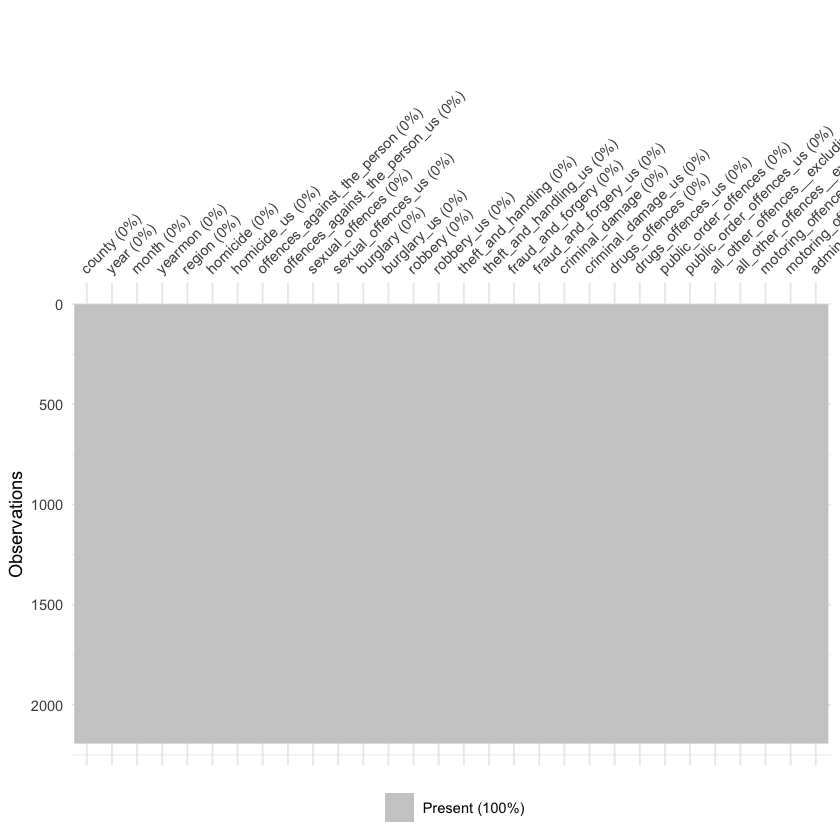

In [46]:
vis_miss(combined_df)

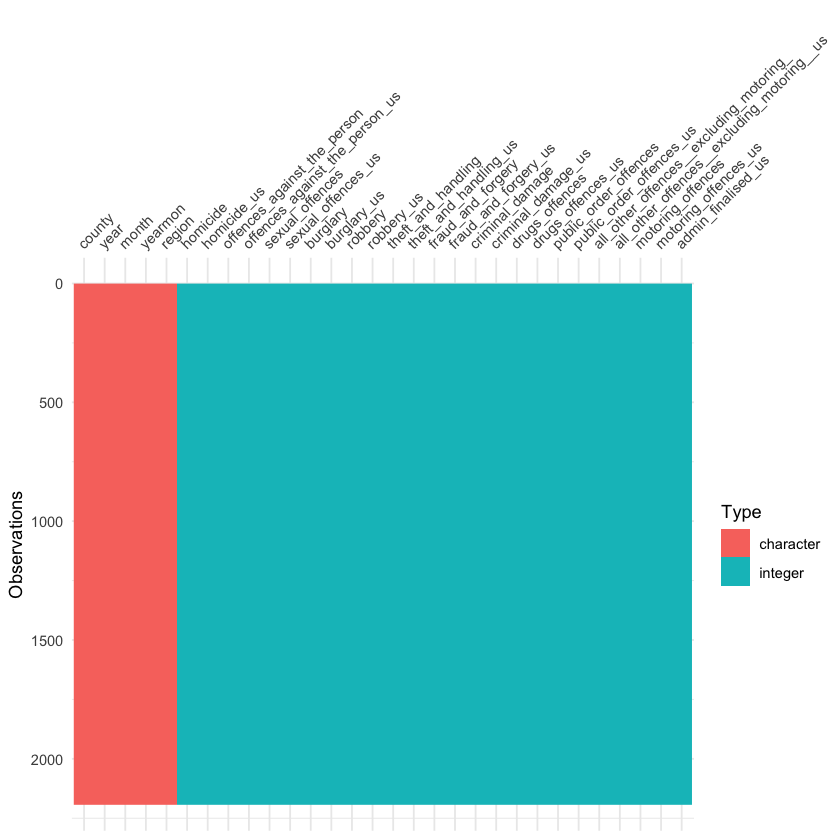

In [47]:
vis_dat(combined_df)

In [48]:
split_dataframe <- function(df){
  crime_columns = !grepl("_us$", colnames(df))
  unsuccesful_columns = grepl("_us$",  colnames(df))
  unsuccesful_columns[0:5] <- TRUE
  df1 <- df[, crime_columns]
  df2 <- df[, unsuccesful_columns]
  return(list(df1, df2))
}

In [49]:
splited_dataframes <- split_dataframe(combined_df)

In [50]:
head(splited_dataframes[1])

,county,year,month,yearmon,region,homicide,offences_against_the_person,sexual_offences,burglary,robbery,theft_and_handling,fraud_and_forgery,criminal_damage,drugs_offences,public_order_offences,all_other_offences__excluding_motoring_,motoring_offences
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,All,51,9087,736,1715,522,11057,846,2693,4988,4752,3291,12945
174,Avon and Somerset,2014,jan,2014-01-01,West,0,228,35,49,8,338,18,93,148,123,63,256
175,Bedfordshire,2014,jan,2014-01-01,East,0,68,2,7,16,75,17,22,31,30,13,171
176,Cambridgeshire,2014,jan,2014-01-01,East,0,101,10,18,6,148,10,30,47,37,28,103
177,Cheshire,2014,jan,2014-01-01,North,0,170,15,38,10,205,14,39,64,77,50,264
178,Cleveland,2014,jan,2014-01-01,North,2,119,11,36,3,334,11,46,65,123,34,228
179,Cumbria,2014,jan,2014-01-01,North,0,113,4,16,1,115,6,38,52,78,52,112
180,Derbyshire,2014,jan,2014-01-01,East,0,135,22,36,5,194,15,53,86,59,28,251
181,Devon and Cornwall,2014,jan,2014-01-01,West,0,220,16,25,10,199,18,74,96,83,75,410


In [51]:
head(splited_dataframes[2])

,county,year,month,yearmon,region,homicide_us,offences_against_the_person_us,sexual_offences_us,burglary_us,robbery_us,theft_and_handling_us,fraud_and_forgery_us,criminal_damage_us,drugs_offences_us,public_order_offences_us,all_other_offences__excluding_motoring__us,motoring_offences_us,admin_finalised_us
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,All,11,2930,286,284,139,998,137,472,305,797,586,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,West,0,62,17,1,0,32,0,14,4,28,9,40,20
175,Bedfordshire,2014,jan,2014-01-01,East,1,29,1,4,7,4,3,8,3,9,2,13,12
176,Cambridgeshire,2014,jan,2014-01-01,East,0,21,3,4,4,15,4,3,1,2,9,16,14
177,Cheshire,2014,jan,2014-01-01,North,0,40,1,5,0,5,1,3,3,8,5,16,13
178,Cleveland,2014,jan,2014-01-01,North,3,44,6,2,2,31,3,13,2,27,14,16,3
179,Cumbria,2014,jan,2014-01-01,North,0,13,3,0,0,7,0,3,1,2,5,7,12
180,Derbyshire,2014,jan,2014-01-01,East,1,58,7,4,2,17,0,12,9,15,12,9,13
181,Devon and Cornwall,2014,jan,2014-01-01,West,0,64,3,4,0,23,2,9,5,11,14,31,10


In [52]:
write.csv(splited_dataframes[1], "dataset/cleaned-crime-data.csv", row.names=FALSE)

In [53]:
write.csv(splited_dataframes[2], "dataset/cleaned-unsuccessful-crime-data.csv", row.names=FALSE)

In [54]:
write.csv(combined_df, "dataset/cleaned-data.csv", row.names=FALSE)

# Descriptive Analytics

In [55]:
crime_df = read.csv("dataset/cleaned-crime-data.csv")

In [56]:
uscrime_df = read.csv("dataset/cleaned-unsuccessful-crime-data.csv")

In [57]:
head(crime_df)

,county,year,month,yearmon,region,homicide,offences_against_the_person,sexual_offences,burglary,robbery,theft_and_handling,fraud_and_forgery,criminal_damage,drugs_offences,public_order_offences,all_other_offences__excluding_motoring_,motoring_offences
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,National,2014,jan,2014-01-01,All,51,9087,736,1715,522,11057,846,2693,4988,4752,3291,12945
2,Avon and Somerset,2014,jan,2014-01-01,West,0,228,35,49,8,338,18,93,148,123,63,256
3,Bedfordshire,2014,jan,2014-01-01,East,0,68,2,7,16,75,17,22,31,30,13,171
4,Cambridgeshire,2014,jan,2014-01-01,East,0,101,10,18,6,148,10,30,47,37,28,103
5,Cheshire,2014,jan,2014-01-01,North,0,170,15,38,10,205,14,39,64,77,50,264
6,Cleveland,2014,jan,2014-01-01,North,2,119,11,36,3,334,11,46,65,123,34,228


In [58]:
head(uscrime_df)

,county,year,month,yearmon,region,homicide_us,offences_against_the_person_us,sexual_offences_us,burglary_us,robbery_us,theft_and_handling_us,fraud_and_forgery_us,criminal_damage_us,drugs_offences_us,public_order_offences_us,all_other_offences__excluding_motoring__us,motoring_offences_us,admin_finalised_us
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,National,2014,jan,2014-01-01,All,11,2930,286,284,139,998,137,472,305,797,586,1466,890
2,Avon and Somerset,2014,jan,2014-01-01,West,0,62,17,1,0,32,0,14,4,28,9,40,20
3,Bedfordshire,2014,jan,2014-01-01,East,1,29,1,4,7,4,3,8,3,9,2,13,12
4,Cambridgeshire,2014,jan,2014-01-01,East,0,21,3,4,4,15,4,3,1,2,9,16,14
5,Cheshire,2014,jan,2014-01-01,North,0,40,1,5,0,5,1,3,3,8,5,16,13
6,Cleveland,2014,jan,2014-01-01,North,3,44,6,2,2,31,3,13,2,27,14,16,3


## Attributes Analysis

In [59]:
print_summary <- function(dataframe){
  for (i in colnames(dataframe)){
    print(i)
    print(summary(dataframe[,i]))
  }
}

In [60]:
print_summary(crime_df)

[1] "county"
   Length     Class      Mode 
     2193 character character 
[1] "year"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2014    2015    2016    2016    2017    2018 
[1] "month"
   Length     Class      Mode 
     2193 character character 
[1] "yearmon"
   Length     Class      Mode 
     2193 character character 
[1] "region"
   Length     Class      Mode 
     2193 character character 
[1] "homicide"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.798   3.000 131.000 
[1] "offences_against_the_person"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   29.0   115.0   179.0   454.9   272.0 11741.0 
[1] "sexual_offences"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   15.00   43.78   29.00 1179.00 
[1] "burglary"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   23.00   60.09   38.00 1715.00 
[1] "robbery"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    5.00   19.33   10.00  650.00 
[

In [61]:
print_summary(uscrime_df)

[1] "county"
   Length     Class      Mode 
     2193 character character 
[1] "year"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2014    2015    2016    2016    2017    2018 
[1] "month"
   Length     Class      Mode 
     2193 character character 
[1] "yearmon"
   Length     Class      Mode 
     2193 character character 
[1] "region"
   Length     Class      Mode 
     2193 character character 
[1] "homicide_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9138  1.0000 35.0000 
[1] "offences_against_the_person_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    27.0    46.0   135.4    77.0  3568.0 
[1] "sexual_offences_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    4.00   16.19   11.00  489.00 
[1] "burglary_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    3.00   10.14    6.00  317.00 
[1] "robbery_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    5.16    

## Analysis dependent on Regions

In [62]:
group_by_region <- function(dataframe){
  dataframe <- dataframe[,-c(1:4)]
  dataframe <- group_by(dataframe, region)
  summarise_all(dataframe, funs(sum))
}

In [63]:
group_by_region(crime_df)

region,homicide,offences_against_the_person,sexual_offences,burglary,robbery,theft_and_handling,fraud_and_forgery,criminal_damage,drugs_offences,public_order_offences,all_other_offences__excluding_motoring_,motoring_offences
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
All,4164,498848,48008,65887,21191,409071,42297,105067,204659,178097,70548,400717
East,706,88450,7707,10274,3147,69920,6709,18328,30252,28563,9102,68890
North,1176,156991,15293,23332,6112,142038,10648,37010,55656,63954,22082,119034
South,1352,137299,13929,17916,7394,100035,16668,25181,74147,44489,23837,110545
West,930,116108,11079,14365,4538,97078,8272,24548,44604,41091,15527,102248


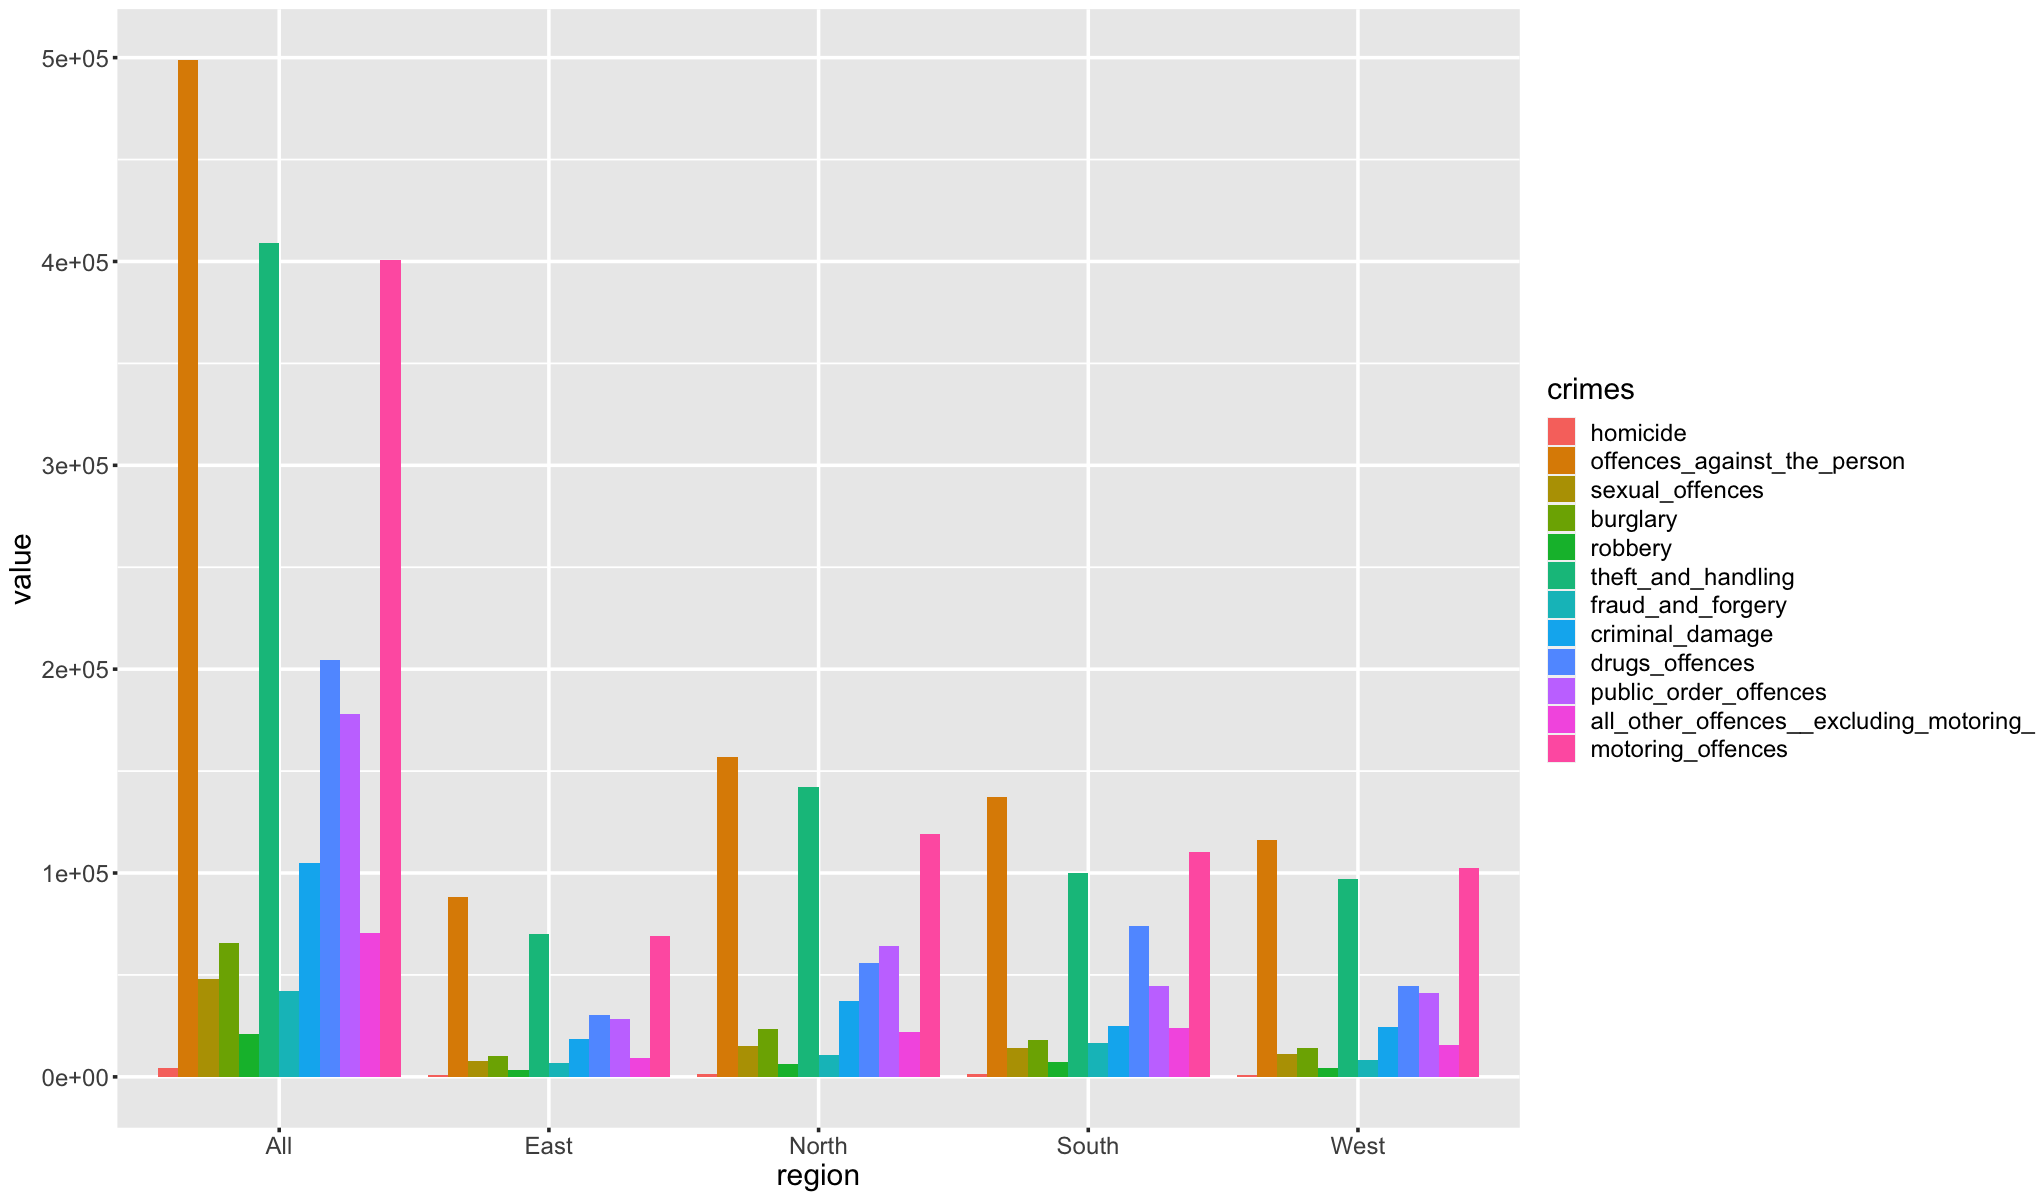

In [64]:
df <- melt(group_by_region(crime_df) ,  id.vars = 'region', variable.name = 'crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

In [65]:
group_by_region(uscrime_df)

region,homicide_us,offences_against_the_person_us,sexual_offences_us,burglary_us,robbery_us,theft_and_handling_us,fraud_and_forgery_us,criminal_damage_us,drugs_offences_us,public_order_offences_us,all_other_offences__excluding_motoring__us,motoring_offences_us,admin_finalised_us
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
All,1002,148502,17747,11121,5658,36657,6833,18021,13786,31190,13064,66835,42562
East,141,23255,2214,1649,841,6278,1040,3128,1959,4527,1881,11024,7531
North,230,41109,5378,3335,1290,10500,1629,5894,3627,9345,3549,17356,9352
South,433,52070,6208,3806,2279,12641,2885,5217,5757,10631,5081,23337,16505
West,198,32068,3947,2331,1248,7238,1279,3782,2443,6687,2553,15118,9174


In [66]:
# Better for dates
# df <- melt(group_by_region(crime_df) ,  id.vars = 'region', variable.name = 'series')
# ggplot(df, aes(index, value)) +
#   geom_line(aes(colour = series))

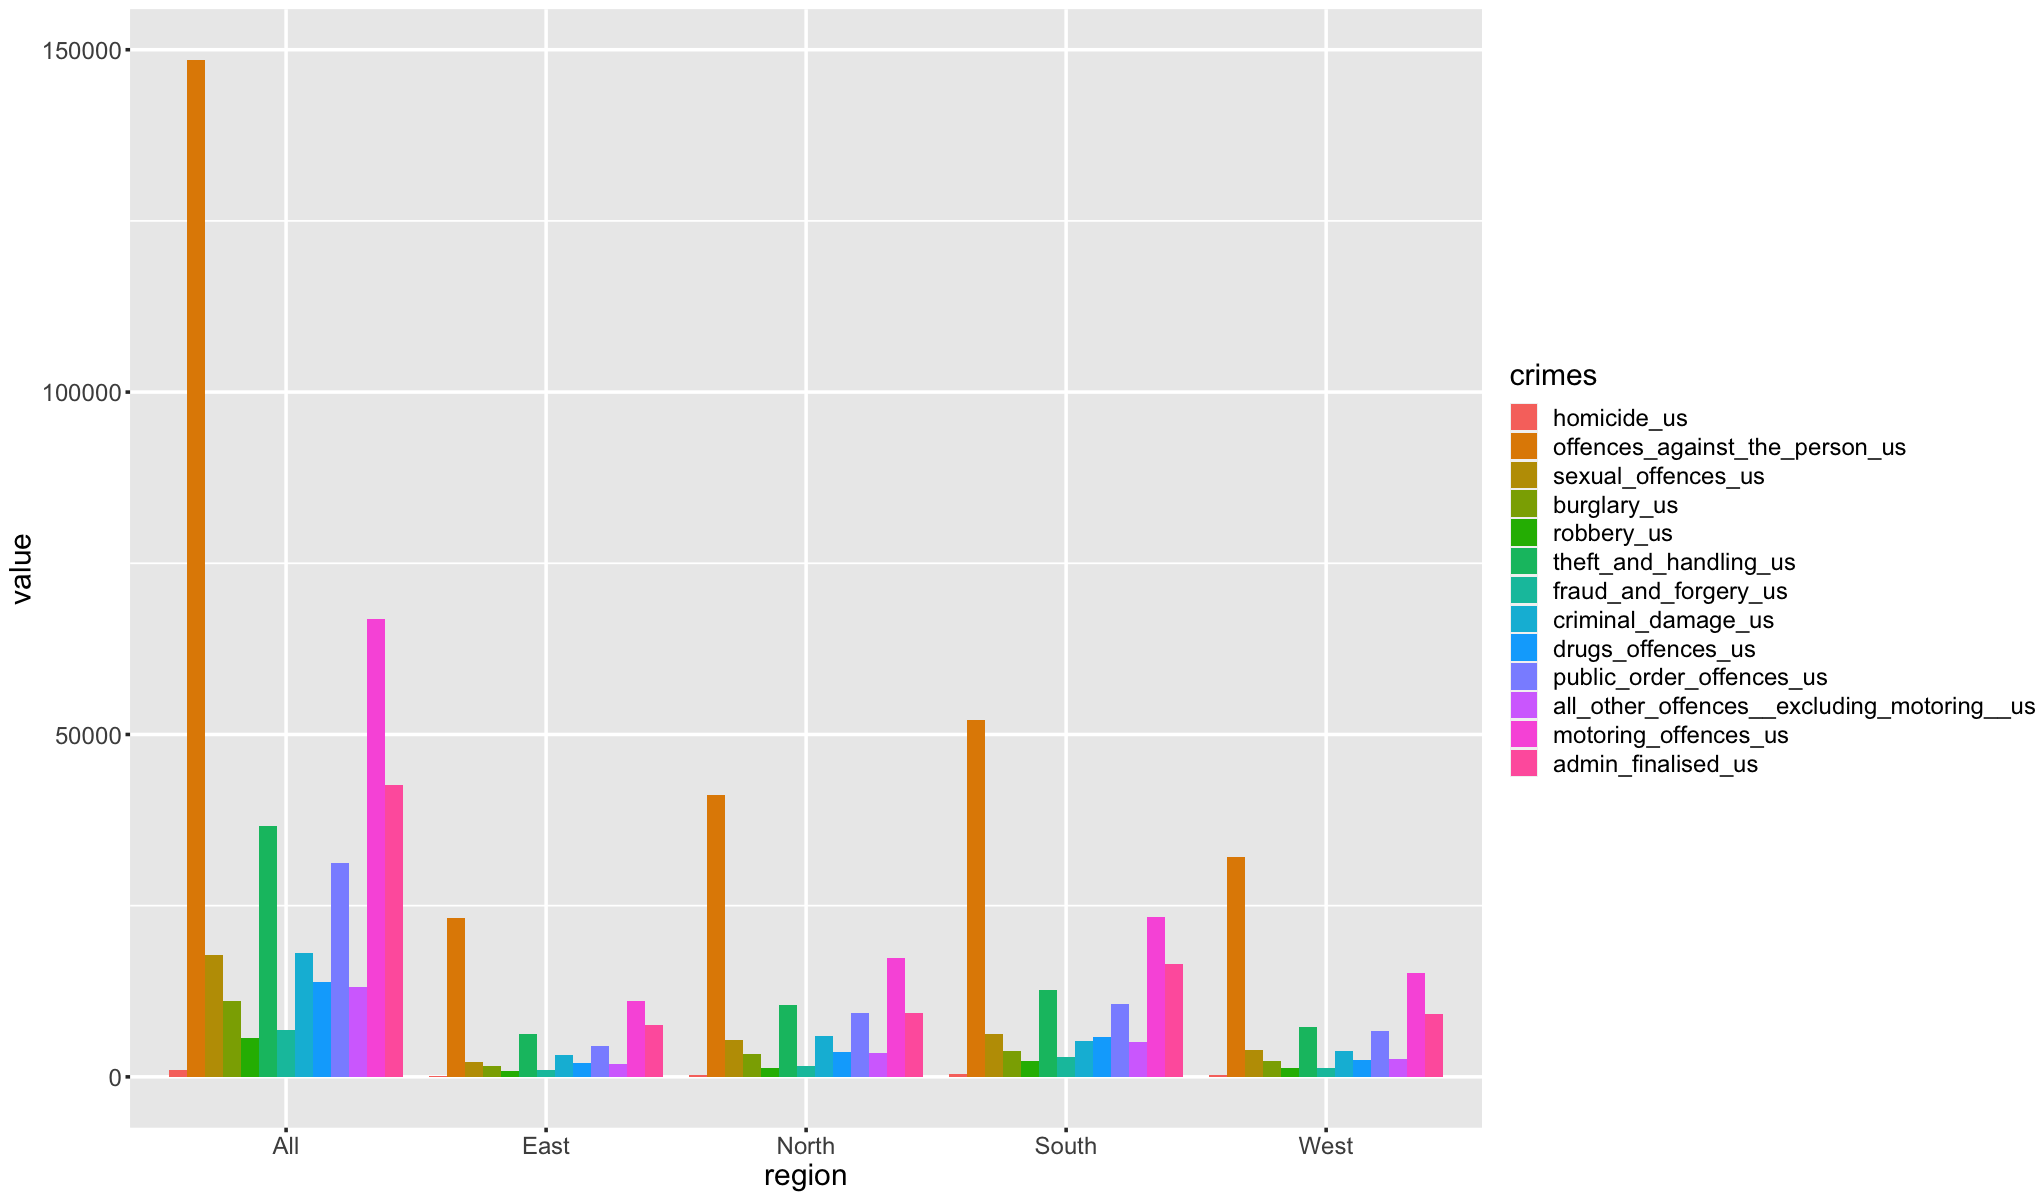

In [67]:
df <- melt(group_by_region(uscrime_df) ,  id.vars = 'region', variable.name = 'crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

In [68]:
# https://stackoverflow.com/questions/68096830/how-to-plot-monthly-and-daily-data-in-same-canvas

# Single Plot for Multiple Columns -- Better for dates
# https://www.statology.org/plot-multiple-columns-in-r/

# https://www.guru99.com/r-bar-chart-histogram.html

# bar chart for multiple
# https://stackoverflow.com/questions/10212106/creating-grouped-bar-plot-of-multi-column-data-in-r

In [69]:
group_by_region_all_crimes <- function(dataframe){
  dataframe <- dataframe[,-c(1:4)]
  dataframe$sum_of_all <- rowSums(dataframe[, sapply(dataframe, is.numeric)])
  dataframe <- dataframe[, c("region", "sum_of_all")]
  dataframe <- group_by(dataframe, region)
  summarise_all(dataframe, funs(sum))
}

In [70]:
group_by_region_all_crimes(crime_df)

region,sum_of_all
<chr>,<dbl>
All,2048554
East,342048
North,653326
South,572792
West,480388


In [71]:
group_by_region_all_crimes(uscrime_df)

region,sum_of_all
<chr>,<dbl>
All,412978
East,65468
North,112594
South,146850
West,88066


## Analysis dependent on Years & Months

In [193]:
group_by_year_month <- function(dataframe){
  dataframe <- select(dataframe, -c("year", "yearmon", "region"))
  dataframe$sum_of_all <- rowSums(dataframe[, sapply(dataframe, is.numeric)])
  dataframe <- select(dataframe, c("county", "month", "sum_of_all"))
  dataframe <- group_by(dataframe, county, month)
  summarise_all(dataframe, funs(sum))
}

In [194]:
group_by_year_month(crime_df)
# crime_df

county,month,sum_of_all
<chr>,<chr>,<dbl>
Avon and Somerset,apr,3219
Avon and Somerset,aug,4847
Avon and Somerset,dec,4290
Avon and Somerset,feb,4226
Avon and Somerset,jan,5840
Avon and Somerset,jul,5557
Avon and Somerset,jun,3370
Avon and Somerset,mar,5120
Avon and Somerset,may,3054


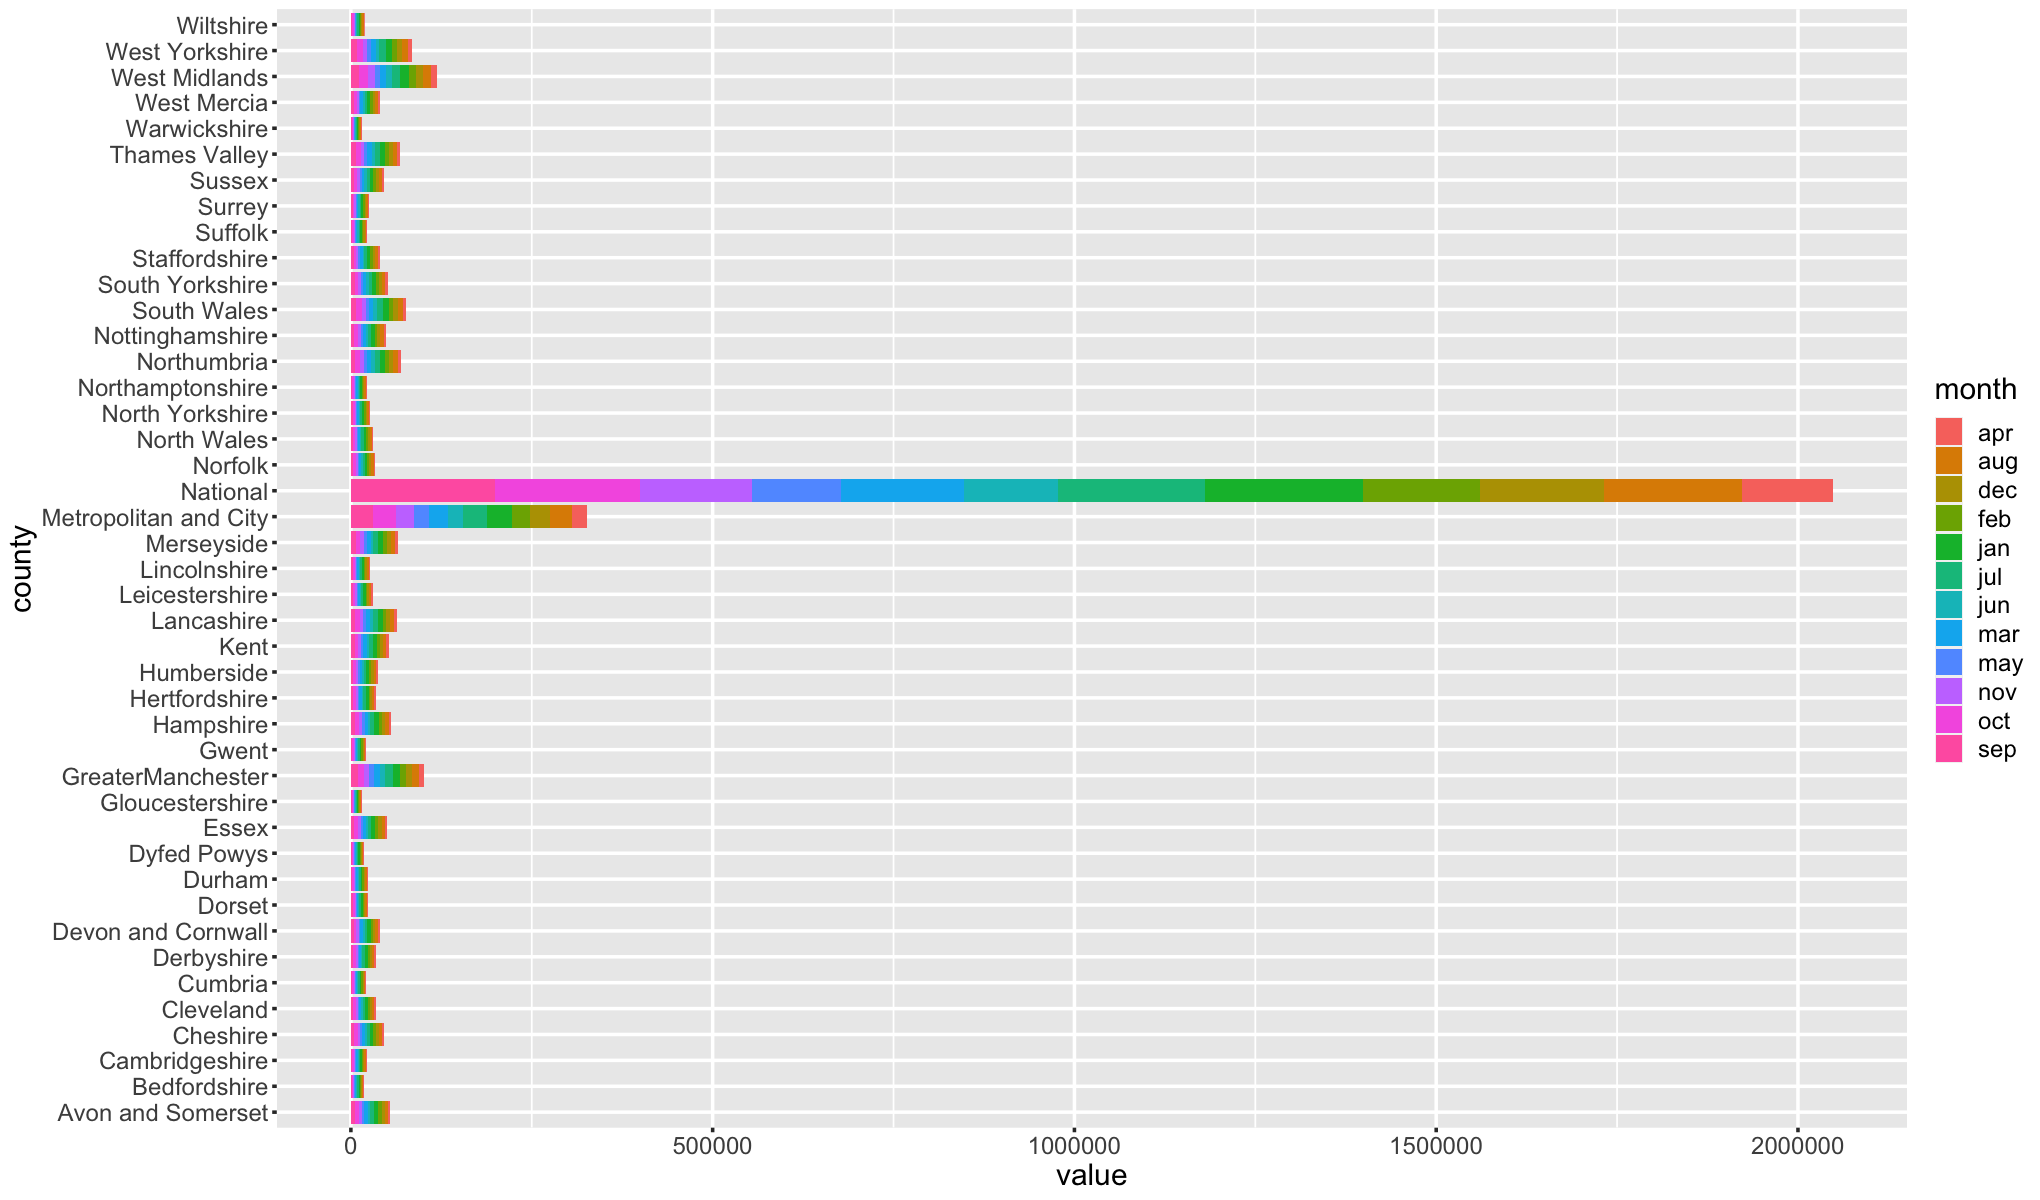

In [202]:
df <- melt(group_by_year_month(crime_df) ,  id.vars = c('county', 'month'), variable.name = 'crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = value, y = county)) + 
geom_bar(aes(fill = month),stat = "identity", position = "stack", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

In [76]:
crime_df

county,year,month,yearmon,region,homicide,offences_against_the_person,sexual_offences,burglary,robbery,theft_and_handling,fraud_and_forgery,criminal_damage,drugs_offences,public_order_offences,all_other_offences__excluding_motoring_,motoring_offences
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
National,2014,jan,2014-01-01,All,51,9087,736,1715,522,11057,846,2693,4988,4752,3291,12945
Avon and Somerset,2014,jan,2014-01-01,West,0,228,35,49,8,338,18,93,148,123,63,256
Bedfordshire,2014,jan,2014-01-01,East,0,68,2,7,16,75,17,22,31,30,13,171
Cambridgeshire,2014,jan,2014-01-01,East,0,101,10,18,6,148,10,30,47,37,28,103
Cheshire,2014,jan,2014-01-01,North,0,170,15,38,10,205,14,39,64,77,50,264
Cleveland,2014,jan,2014-01-01,North,2,119,11,36,3,334,11,46,65,123,34,228
Cumbria,2014,jan,2014-01-01,North,0,113,4,16,1,115,6,38,52,78,52,112
Derbyshire,2014,jan,2014-01-01,East,0,135,22,36,5,194,15,53,86,59,28,251
Devon and Cornwall,2014,jan,2014-01-01,West,0,220,16,25,10,199,18,74,96,83,75,410


In [ ]:
df <- melt(group_by_region(uscrime_df) ,  id.vars = 'month', variable.name = 'crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

## Analysis between Crime Types

## Correlation

In [72]:
corr_matrix_graph <- function(dataframe){
  num_cols <- sapply(dataframe, is.numeric)
  corr_matrix <- cor(dataframe[,num_cols])
  corrplot(corr_matrix, type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", is.corr = TRUE, mar = c(0, 0, 0, 0))
}

In [73]:
corr_matrix_graph(df)

ERROR: Error in cor(dataframe[, num_cols]): supply both 'x' and 'y' or a matrix-like 'x'


# Covarince

In [ ]:
cov_matrix_graph <- function(dataframe){
  num_cols <- sapply(dataframe, is.numeric)
  num_cols <- names(num_cols[num_cols])
  cov_matrix <- cov(dataframe[,num_cols])
  corrplot(cov_matrix, type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", is.corr = FALSE, mar = c(0, 0, 0, 0))
}

In [ ]:
cov_matrix_graph(df)

# Predictive Analytics

-- The rate of un-succesful crimes is increasing or decreasing every year, which imposes either the courst system is gettng better or police is geeting better.

-- The number of crimes have increased every year.

-- A, B region has more increase in crimes than C, D region.

-- The number of crimes increase by the end of the year as compared to the start of the year.



## Linear Regression

## Clustering

## Classification

In [ ]:
1: classifying the region of the crime based

# Prescriptive Analytics

In [ ]:
-- The number of crimes are increasing every year.

## Time Series Forecasting

Suggesting any particular month to look out for specific crime peaks and telling which ones could go down.